In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from data_utils import DataUtils

In [2]:
df = pd.read_csv('./data/mtsamples.csv', index_col=0)
df.sample(10)

,description,medical_specialty,sample_name,transcription,keywords
4112,Itchy red rash on feet - Tinea Pedis,Consult - History and Phy.,Tinea Pedis - H&P,"CHIEF COMPLAINT (1/1): ,This 24 year-old fema...",NaN
4346,H&P for a female with Angina pectoris.,Consult - History and Phy.,H&P - Cardio (Angina),"CHIEF COMPLAINT (1/1):, This 62 year old femal...",NaN
437,"Phacoemulsification of cataract, extraocular ...",Surgery,Phacoemulsification of Cataract - 1,"PREOPERATIVE DIAGNOSES:,1. Senile nuclear cat...","surgery, senile nuclear cataract, senile, phac..."
4725,Multiple stent placements with Impella circul...,Cardiovascular / Pulmonary,Multiple Stent Placements,"PROCEDURE PERFORMED:,1. Left heart catheteriz...","cardiovascular / pulmonary, impella circulator..."
4382,Patient with confusion and hallucinations.,Consult - History and Phy.,Gen Med Consult - 35,"Chief Complaint:, Confusion and hallucinations...",NaN
3077,Patient seen in Neuro-Oncology Clinic because...,Letters,Anaplastic Astrocytoma - Letter,"XYZ,RE: ABC,MEDICAL RECORD#: 123,Dear Dr. XY...","letters, neuro oncology, anaplastic astrocytom..."
3736,Right middle ear exploration with a Goldenber...,ENT - Otolaryngology,Middle Ear Exploration,"PREOPERATIVE DIAGNOSIS: , Right profound mixed...","ent - otolaryngology, conductive hearing loss,..."
1247,Anterior cervical discectomy with decompressi...,Surgery,Anterior Cervical Discectomy & Fusion - 4,"PREOPERATIVE DIAGNOSIS: , Cervical myelopathy,...",NaN
3993,Elevated cholesterol and is on medication to ...,Diets and Nutritions,Dietary Consult - 1,"SUBJECTIVE:, His brother, although he is a ve...","diets and nutritions, vegetarian, lipids, chol..."
3128,Left breast cancer. Nuclear medicine lymphat...,Hematology - Oncology,Nuclear Medicine Lymphatic Scan,"EXAM:, Nuclear medicine lymphatic scan.,REASO...","hematology - oncology, technetium-99m, mci, bi..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


===== Class Distribution =====
medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Dentistry                          27
C

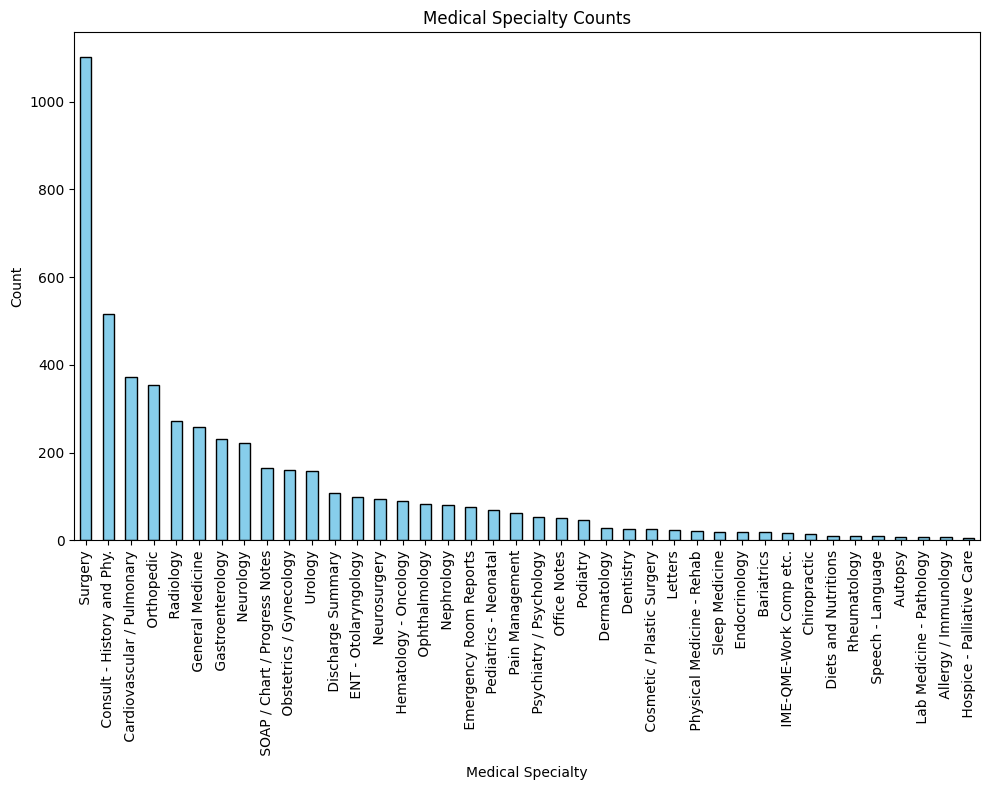

In [4]:
utils = DataUtils()
_ = utils.class_distribution(df.medical_specialty, 'Medical Specialty', show_plot=True)

In [5]:
texts = df['transcription'].fillna('')
texts = texts.map(utils.clean_text)

tok_freq = Counter(tok for row in texts for tok in row.split() if tok)

print("\nMost common tokens:")
for tok, freq in tok_freq.most_common (10):
    print(f"Token: '{tok}', Frequency: {freq}")


Most common tokens:
Token: 'the', Frequency: 149888
Token: 'and', Frequency: 82777
Token: 'was', Frequency: 71745
Token: 'of', Frequency: 59189
Token: 'to', Frequency: 50613
Token: 'a', Frequency: 42910
Token: 'with', Frequency: 35787
Token: 'in', Frequency: 32753
Token: '.', Frequency: 31894
Token: 'is', Frequency: 26377


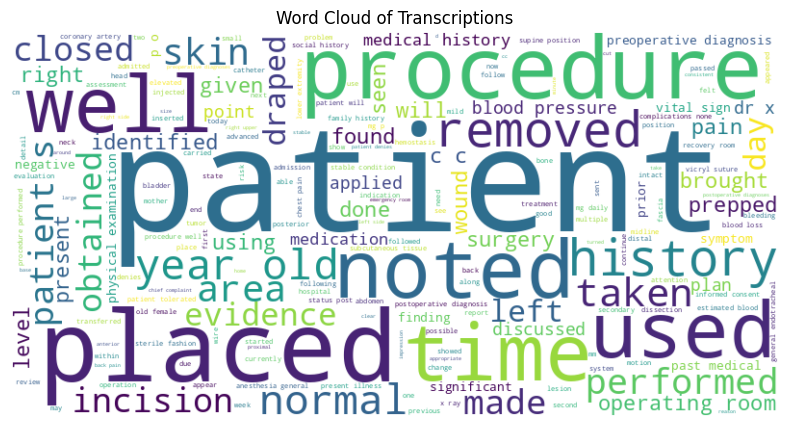

In [6]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Transcriptions")
plt.show()


             length     word_cnt
count   4999.000000  4999.000000
mean    2911.011402   469.758552
std     1934.354157   319.693225
min        0.000000     0.000000
25%     1524.000000   244.000000
50%     2538.000000   405.000000
75%     3844.000000   622.000000
max    17868.000000  3035.000000


array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'word_cnt'}>]], dtype=object)

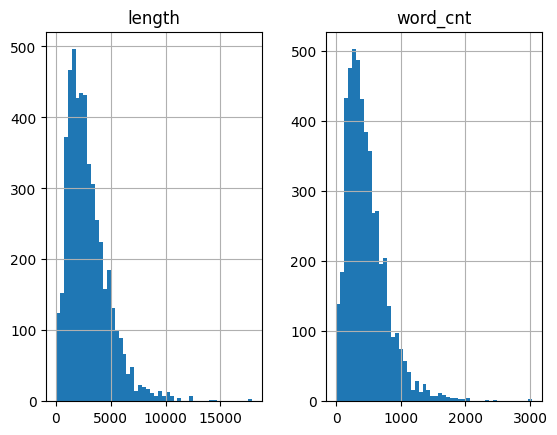

In [7]:
stats = pd.DataFrame()
stats['length'] = texts.apply(len)
stats['word_cnt'] = texts.apply(lambda x: len(x.split()))
print(f"\n{stats.describe()}")
stats.hist(bins=50)